## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [630]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

from numpy import linalg as la

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [631]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):
    '''Entrees :
    X = [ones(N_train,1) x_train];
    t = class_train 
    Nitermax = nombre maximale d'itérations (20 par défaut)
    eps_conv = critère de convergence sur norm(w-w_old)/norm(w) ; 
    eps_conv=1e-3 par défaut
    
    Sorties : 
    w : vecteur des coefficients de régression logistique
   Niter : nombre d'itérations utilisées effectivement
   
   Fonction de régression logistique pour la classification binaire.
   
   Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''
    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # boucle appliquant l'algorithme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ):
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter


### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [632]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)


### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [633]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


In [634]:
#Exercise 1

import plotly.graph_objects as go
w, Niter = regression_logistique(X, t, Nitermax=50, eps_conv=1e-3)
print("w = ", w)
def decision(X,w):
    '''prediction de la classe par la regression logistique
    Entrees : 
        X = [ones(N,1) x];
        w = vecteur des coefficients de regression
    Sortie : 
        y = prediction de la classe (1 ou 2)
    '''
    y=1/(1+np.exp(-X.dot(w)))
    y[y>=0.5]=1
    y[y<0.5]=0 
    return y
t_out=decision(X_test,w)
y=2-t_out #inverse transofrmation of t=2-y

#print with plotly
fig = go.Figure()
#add the training points
fig.add_trace(go.Scatter(x=x_train[class_train_1,0], y=x_train[class_train_1,1], mode='markers', name='class 1 - train'))
fig.add_trace(go.Scatter(x=x_train[class_train_2,0], y=x_train[class_train_2,1], mode='markers', name='class 2 - train'))
#add the test points
fig.add_trace(go.Scatter(x=x_test[y==1,0], y=x_test[y==1,1], mode='markers', name='class 1 - test'))
fig.add_trace(go.Scatter(x=x_test[y==2,0], y=x_test[y==2,1], mode='markers', name='class 2 - test'))

#add the decision boundary
x1 = np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), 100)
x2 = -(w[0] + w[1]*x1)/w[2]
fig.add_trace(go.Scatter(x=x1, y=x2, mode='lines', name='decision boundary'))
#add the decision boundary's equation
fig.add_annotation(x=x1[-1]+0.1, y=x2[-1]+0.1, text=str(round(w[0],2))+" + "+str(round(w[1],2)) +" * x1 + "+ str(round(w[2],2))+" * x2 = 0", showarrow=False)

fig.show()

#compute error
error = np.sum(t_out!=t_test)/N_test
print("error = ", error)


w =  [-15.206658    -7.91866363   6.56243114]


error =  0.06


In [635]:
#add some point far from the boundary to a test_set2
#generate 20 points of dimension 2 centered in (5,3) with a standard deviation of 0.3
np.random.seed(42)
add_x= np.random.normal(0, 0.3, (10,2))+np.array([4,3])
add_x2= np.random.normal(0, 0.3, (10,2))+np.array([5,-1])
x_train2 = np.vstack((x_train, add_x))
x_train2 = np.vstack((x_train2, add_x2))
add_y=np.array([1]*10)
add_y2=np.array([2]*10)
class_train2 = np.hstack((class_train, add_y))
class_train2 = np.hstack((class_train2, add_y2))
N_train2 = np.size(x_train2,axis=0)
X2 = np.hstack((np.ones((N_train2,1)),x_train2))
t2 = 2-class_train2   # 0 if class=2, 1 if class=1

w2, Niter2 = regression_logistique(X2, t2, Nitermax=50, eps_conv=1e-3)
print("w2 = ", w2)

t_out2=decision(X_test,w2)
y2=2-t_out2 #inverse transofrmation of t=2-y

#print with plotly
fig = go.Figure()
#add the training points
fig.add_trace(go.Scatter(x=x_train2[class_train2==1,0], y=x_train2[class_train2==1,1], mode='markers', name='class 1 - train'))
fig.add_trace(go.Scatter(x=x_train2[class_train2==2,0], y=x_train2[class_train2==2,1], mode='markers', name='class 2 - train'))
#add the test points
fig.add_trace(go.Scatter(x=x_test[y2==1,0], y=x_test[y2==1,1], mode='markers', name='class 1 - test'))
fig.add_trace(go.Scatter(x=x_test[y2==2,0], y=x_test[y2==2,1], mode='markers', name='class 2 - test'))

#add the decision boundary
x1 = np.linspace(np.min(x_train2[:,0]), np.max(x_train2[:,0]), 100)
x2 = -(w2[0] + w2[1]*x1)/w2[2]
fig.add_trace(go.Scatter(x=x1, y=x2, mode='lines', name='decision boundary'))
#add the decision boundary's equation
fig.add_annotation(x=x1[-1]-0.1, y=x2[-1]-0.5, text=str(round(w2[0],2))+" + "+str(round(w2[1],2)) +" * x1 + "+ str(round(w2[2],2))+" * x2 = 0", showarrow=False)

fig.show()

#compute error
error2 = np.sum(t_out2!=t_test)/N_test
print("error2 = ", error2)

w2 =  [-7.41493929 -0.9840497   4.26485328]


error2 =  0.085


By adding 20 points in the training set that are far away for the boundary, we can see that its equation changed a lot in order to satisfy the new points to classify, nevertheless, the error only from 0.06 to 0.085. The model seems very robust.

In [636]:
#do LDA classification on the same data with and without the new points
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(x_train, class_train)
y_pred = clf.predict(x_test)
error_lda = np.sum(y_pred!=class_test)/N_test
print("error_lda = ", error_lda)

clf2 = LinearDiscriminantAnalysis()
clf2.fit(x_train2, class_train2)
y_pred2 = clf2.predict(x_test)
error_lda2 = np.sum(y_pred2!=class_test)/N_test
print("error_lda2 = ", error_lda2)

#draw the decision boundary and points for LDA
fig = go.Figure()
#add the training points
fig.add_trace(go.Scatter(x=x_train[class_train_1,0], y=x_train[class_train_1,1], mode='markers', name='class 1 - train'))
fig.add_trace(go.Scatter(x=x_train[class_train_2,0], y=x_train[class_train_2,1], mode='markers', name='class 2 - train'))
#add the test points
fig.add_trace(go.Scatter(x=x_test[y_pred==1,0], y=x_test[y_pred==1,1], mode='markers', name='class 1 - test'))
fig.add_trace(go.Scatter(x=x_test[y_pred==2,0], y=x_test[y_pred==2,1], mode='markers', name='class 2 - test'))

#add the decision boundary
x1 = np.linspace(np.min(x_train[:,0]), np.max(x_train[:,0]), 100)
x2 = -(clf.intercept_ + clf.coef_[0][0]*x1)/clf.coef_[0][1]
fig.add_trace(go.Scatter(x=x1, y=x2, mode='lines', name='decision boundary'))
#add the decision boundary's equation
fig.add_annotation(x=x1[-1]+0.1, y=x2[-1]+0.1, text=str(round(clf.intercept_[0],2))+" + "+str(round(clf.coef_[0][0],2)) +" * x1 + "+ str(round(clf.coef_[0][1],2))+" * x2 = 0", showarrow=False)

fig.show()

#draw the decision boundary and points for LDA2
fig = go.Figure()
#add the training points
fig.add_trace(go.Scatter(x=x_train2[class_train2==1,0], y=x_train2[class_train2==1,1], mode='markers', name='class 1 - train'))
fig.add_trace(go.Scatter(x=x_train2[class_train2==2,0], y=x_train2[class_train2==2,1], mode='markers', name='class 2 - train'))
#add the test points
fig.add_trace(go.Scatter(x=x_test[y_pred2==1,0], y=x_test[y_pred2==1,1], mode='markers', name='class 1 - test'))
fig.add_trace(go.Scatter(x=x_test[y_pred2==2,0], y=x_test[y_pred2==2,1], mode='markers', name='class 2 - test'))

#add the decision boundary
x1 = np.linspace(np.min(x_train2[:,0]), np.max(x_train2[:,0]), 100)
x2 = -(clf2.intercept_ + clf2.coef_[0][0]*x1)/clf2.coef_[0][1]
fig.add_trace(go.Scatter(x=x1, y=x2, mode='lines', name='decision boundary'))
#add the decision boundary's equation
fig.add_annotation(x=x1[-1]+0.1, y=x2[-1]+0.1, text=str(round(clf2.intercept_[0],2))+" + "+str(round(clf2.coef_[0][0],2)) +" * x1 + "+ str(round(clf2.coef_[0][1],2))+" * x2 = 0", showarrow=False)

fig.show()

error_lda =  0.055
error_lda2 =  0.155


We can see that the LDA is much more sensible than logistic regresseion, the error is almost multipied by 3.

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [637]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


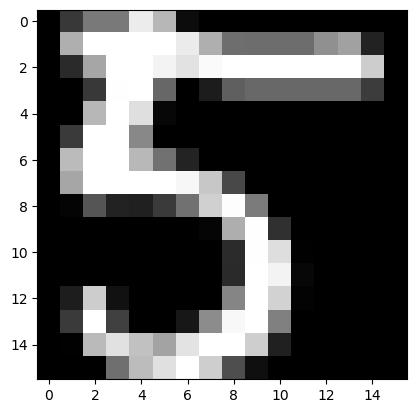

In [638]:
# Digit 5
n=9;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

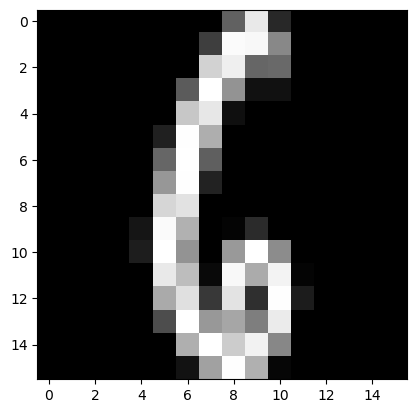

In [639]:
# Digit 6
n=5;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [640]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train
class_test = np.ones((N_test,1))   # label 1 for digit 6
class_test[:len(train_5)-145] = 0       # label 0 for digit 5
class_test=class_test.reshape((N_test,))

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


-1.0 1.0


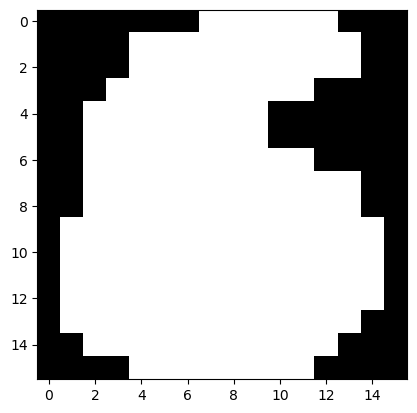

error =  0.07885714285714286


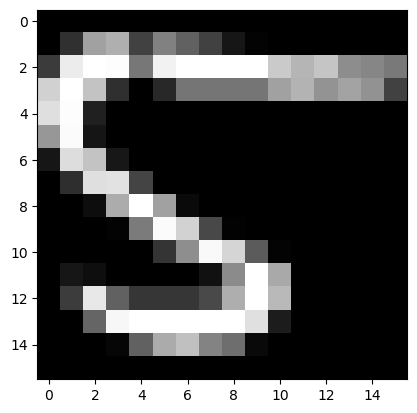

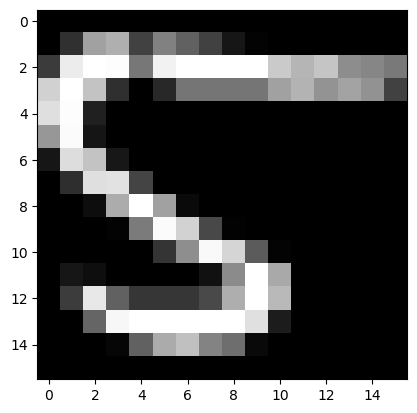

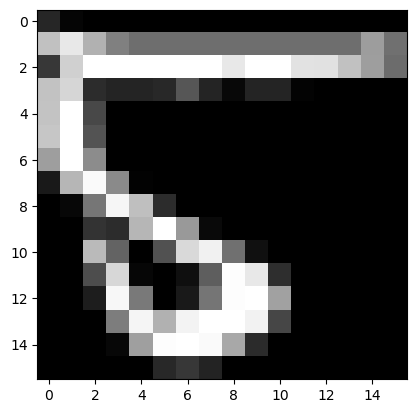

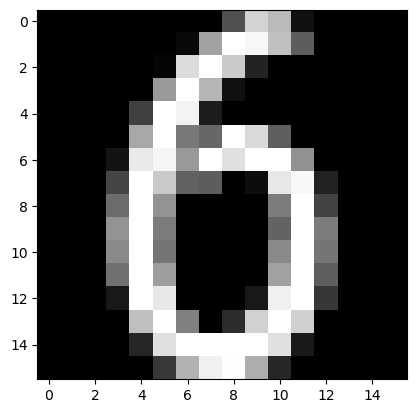

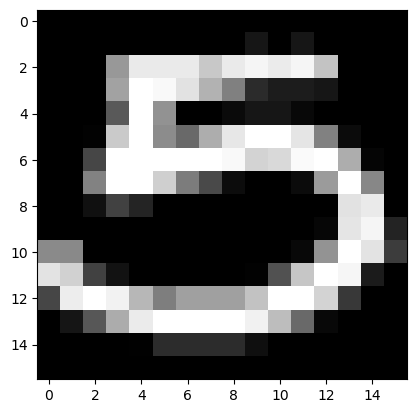

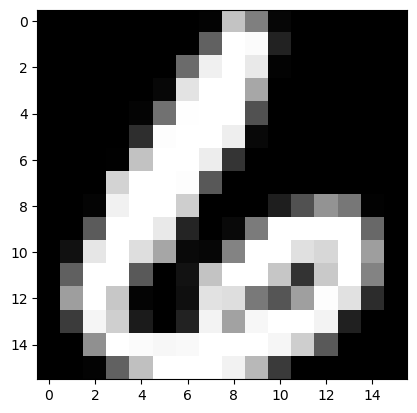

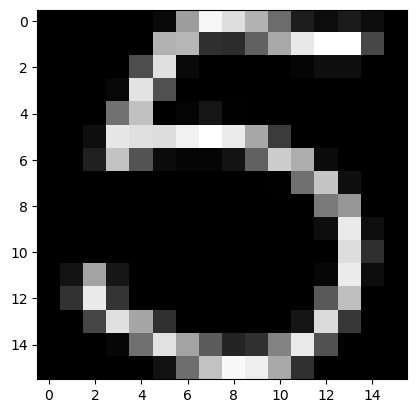

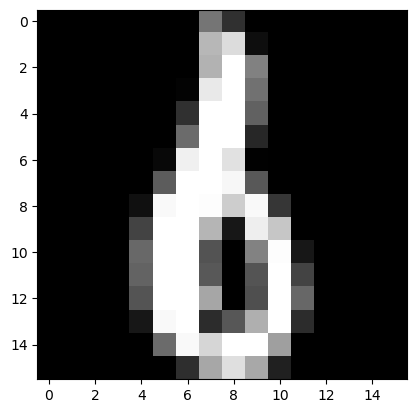

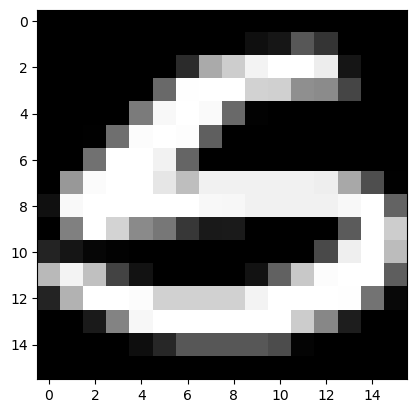

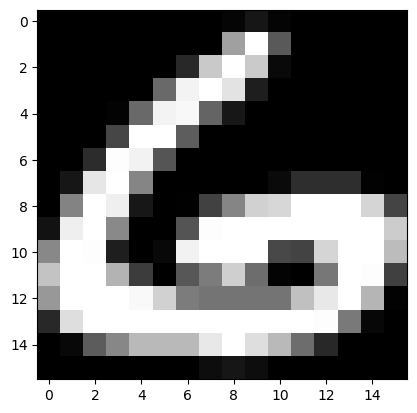

In [641]:
class_train=class_train.reshape((N_train,))

print(np.min(x_train_brut), np.max(x_train_brut))
dev=np.std(x_train_brut,axis=0)
#list of point with dev>0.5
lis_sig=list(np.where(dev>0.5)[0])
img_main=np.zeros((16,16))
for i in lis_sig:
    img_main[i//16,i%16]=1
plt.imshow(img_main,cmap='gray');plt.show()
x_train=x_train_brut[:,lis_sig]
x_test=x_test_brut[:,lis_sig]

#use regression_logistique.m to estimate w from x_train
X = np.hstack((np.ones((N_train,1)),x_train))

X_test = np.hstack((np.ones((N_test,1)),x_test))

w, Niter = regression_logistique(X, class_train, Nitermax=13, eps_conv=1e-3)

t_out=decision(X_test,w)

#compute error
error = np.sum(t_out!=class_test)/N_test
print("error = ", error)

#print a few misclassified digits
misclassified=np.where(t_out!=class_test)[0]
for i in range(5):
    n=misclassified[i] #beginning of the x_test so most liley to be a 5
    m=misclassified[-i] #end of the x_test so most liley to be a 6
    I = x_test_brut[n,:].reshape((16,16))
    plt.imshow(I,cmap='gray')
    plt.show()
    I = x_test_brut[m,:].reshape((16,16))
    plt.imshow(I,cmap='gray')
    plt.show()

Les 5 mal classés sont ceux qui s'étalent sur une large partie de l'image et qui ont une boucle qui se referme presque. Les 6 mal classifiés quant à eux sont soient trop mince ou trop enroulés sur eux même, et on discerne donc mal la boucle. On peut aussi remarquer que le premier '6' mal-classifié que l'on affiche semble être mal classifié dans le fichier de base.

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://kr.coursera.org/lecture/machine-learning/regularized-logistic-regression-cAxpF 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

error_sk =  0.026285714285714287


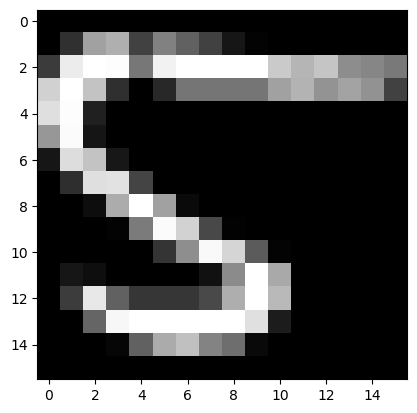

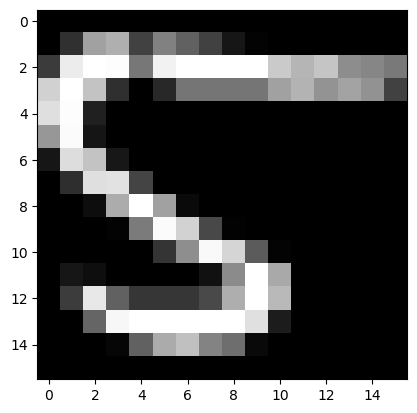

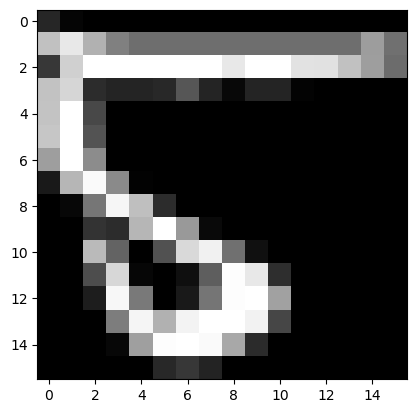

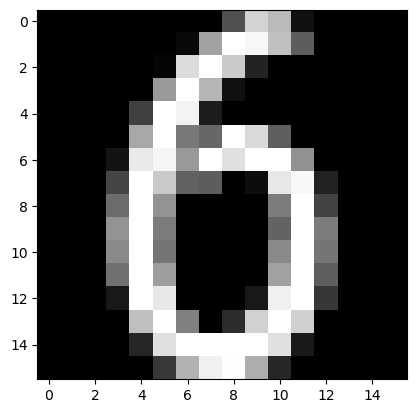

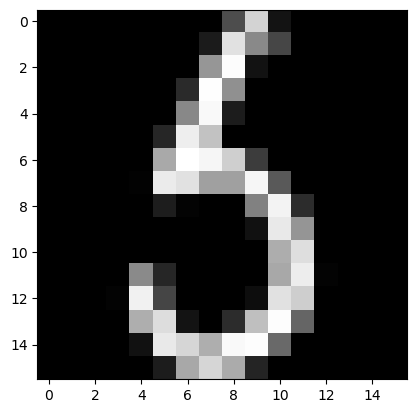

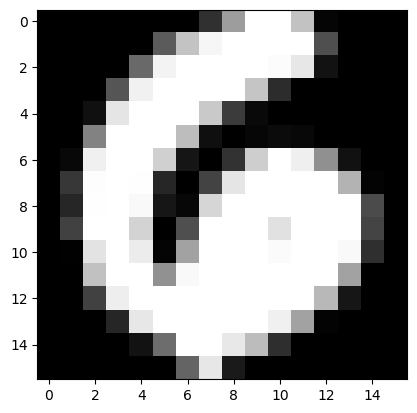

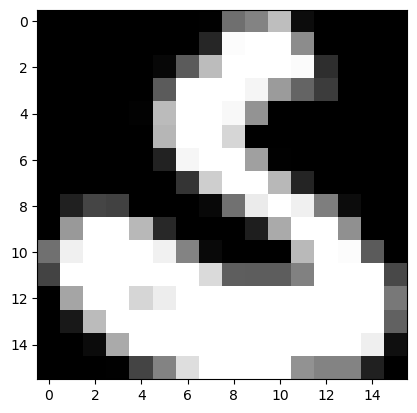

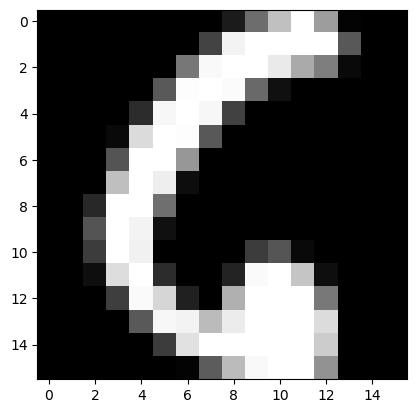

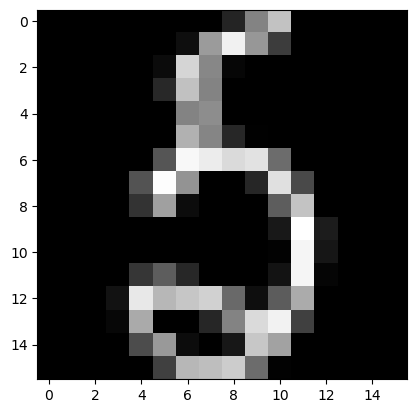

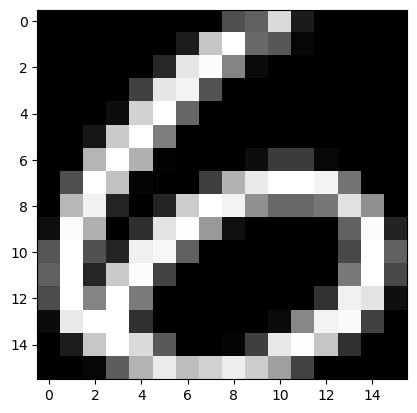

In [642]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, class_train)
y_pred = clf.predict(x_test)
error_sk = np.sum(y_pred!=class_test)/N_test
print("error_sk = ", error_sk)

misclassified=np.where(y_pred!=class_test)[0]
k=len(misclassified)
for i in range(min(5,k//2)):
    n=misclassified[i] #beginning of the x_test so most liley to be a 5
    m=misclassified[-i] #end of the x_test so most liley to be a 6
    I = x_test_brut[n,:].reshape((16,16))
    plt.imshow(I,cmap='gray')
    plt.show()
    I = x_test_brut[m,:].reshape((16,16))
    plt.imshow(I,cmap='gray')
    plt.show()


Commentaires :

Ce n'est pasclair si par 'the current dataset' vous voulez dire celui de 5 et 6 ou le précédent, nous l appliquerons donc au dernier utilsier, celui de 5 et 6.

Les résultats sont meilleurs, on passe de 7.9% d 'erreur à 2.6%. On voit que les digits mal classifiés rentrent dans les mêmes catégories que décrites précédemment, cependnant seul les cas extrêmes restent problématiques.